<a href="https://colab.research.google.com/github/navyavemavarapu/Customer_Conversion_Prediction/blob/main/Customer_Conversion_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_excel("/content/Customer Conversion Prediction.xlsx")

In [3]:
df=df1.copy()

In [4]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58.0,management,married,tertiary,unknown,5.0,may,261.0,1.0,unknown,no
1,44.0,technician,single,secondary,unknown,5.0,may,151.0,1.0,unknown,no
2,33.0,entrepreneur,married,secondary,unknown,5.0,may,76.0,1.0,unknown,no
3,47.0,blue-collar,married,unknown,unknown,5.0,may,92.0,1.0,unknown,no
4,33.0,unknown,single,unknown,unknown,5.0,may,198.0,1.0,unknown,no


In [5]:
print("First 5 rows of data:\n") 
df.head()

First 5 rows of data:



,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58.0,management,married,tertiary,unknown,5.0,may,261.0,1.0,unknown,no
1,44.0,technician,single,secondary,unknown,5.0,may,151.0,1.0,unknown,no
2,33.0,entrepreneur,married,secondary,unknown,5.0,may,76.0,1.0,unknown,no
3,47.0,blue-collar,married,unknown,unknown,5.0,may,92.0,1.0,unknown,no
4,33.0,unknown,single,unknown,unknown,5.0,may,198.0,1.0,unknown,no


**print number of rows and columns in dataset**

In [6]:
print("The original dataset has {} rows and {} columns".format(df.shape[0], df.shape[1]))

The original dataset has 45211 rows and 11 columns


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             45211 non-null  float64
 1   job             45211 non-null  object 
 2   marital         45211 non-null  object 
 3   education_qual  45211 non-null  object 
 4   call_type       45211 non-null  object 
 5   day             45211 non-null  float64
 6   mon             45211 non-null  object 
 7   dur             45211 non-null  float64
 8   num_calls       45211 non-null  float64
 9   prev_outcome    45211 non-null  object 
 10  y               45211 non-null  object 
dtypes: float64(4), object(7)
memory usage: 3.8+ MB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
dur,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
num_calls,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0


# **Data Cleaning**

**Checking duplicates in the data**

In [9]:
df.duplicated().sum()

6

In [10]:
df[df.duplicated()]

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
6893,34.0,services,married,secondary,unknown,28.0,may,124.0,1.0,unknown,no
8138,29.0,admin.,single,secondary,unknown,2.0,jun,121.0,4.0,unknown,no
11630,39.0,blue-collar,married,primary,unknown,19.0,jun,112.0,4.0,unknown,no
13400,36.0,blue-collar,married,secondary,cellular,9.0,jul,183.0,1.0,unknown,no
19826,36.0,management,married,tertiary,cellular,8.0,aug,75.0,2.0,unknown,no
19854,32.0,technician,single,tertiary,cellular,8.0,aug,31.0,2.0,unknown,no


In [11]:
df = df.drop_duplicates().reset_index(drop=True)

In [12]:
df.tail()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
45200,51.0,technician,married,tertiary,cellular,17.0,nov,977.0,3.0,unknown,yes
45201,71.0,retired,divorced,primary,cellular,17.0,nov,456.0,2.0,unknown,yes
45202,72.0,retired,married,secondary,cellular,17.0,nov,1127.0,5.0,success,yes
45203,57.0,blue-collar,married,secondary,telephone,17.0,nov,508.0,4.0,unknown,no
45204,37.0,entrepreneur,married,secondary,cellular,17.0,nov,361.0,2.0,other,no


In [13]:
print("Now the dataset has {} rows and {} columns after dropping duplicates".format(df.shape[0], df.shape[1]))

Now the dataset has 45205 rows and 11 columns after dropping duplicates


# **Target column**

In [14]:
df.rename(columns = {'y':'insurance_stat'}, inplace = True)

In [15]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'insurance_stat'],
      dtype='object')

In [16]:
target_count = df['insurance_stat'].value_counts()
print('Class No:', target_count[0])
print('Class yes:', target_count[1])
print("The percentage of data where insurance is not given:", ((df['insurance_stat']=='no').sum()/df.shape[0])*100)

Class No: 39916
Class yes: 5289
The percentage of data where insurance is not given: 88.29996681782988


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Countplot of target variable')

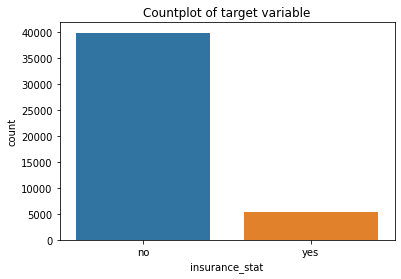

In [17]:
sns.countplot(df['insurance_stat'])
plt.title("Countplot of target variable")

We can see that the data is imbalanced. where 88 percent of data belongs to one class.

# **age**

In [18]:
df['age'][0]

58.0

In [19]:
df['age'].isnull().sum() # No null values

0

**Converting datatype to integer**

In [20]:
df['age'] = df['age'].astype('int64')

In [21]:
df['age'].unique()

array([58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 57, 51, 45, 60, 56, 32,
       25, 40, 39, 52, 46, 36, 49, 59, 37, 50, 54, 55, 48, 24, 38, 31, 30,
       27, 34, 23, 26, 61, 22, 21, 20, 66, 62, 83, 75, 67, 70, 65, 68, 64,
       69, 72, 71, 19, 76, 85, 63, 90, 82, 73, 74, 78, 80, 94, 79, 77, 86,
       95, 81, 18, 89, 84, 87, 92, 93, 88])

In [22]:
len(df['age'].unique())

77

In [23]:
df['age'].describe()

count    45205.000000
mean        40.937087
std         10.619130
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Visualising outliers')

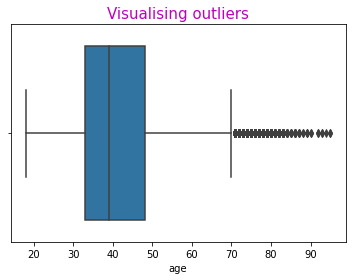

In [24]:
sns.boxplot('age',data=df)
plt.title("Visualising outliers",color='m',size=15)

In [25]:
#Finding the IQR
percentile25 = df['age'].quantile(0.25)
percentile75 = df['age'].quantile(0.75)
iqr=percentile75 - percentile25
print(iqr)
print(percentile25)
print(percentile75)

15.0
33.0
48.0


In [26]:
#Finding upper and lower limit
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print(upper_limit)
print(lower_limit)

70.5
10.5


In [27]:
df[df['age'] < lower_limit]

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,insurance_stat


In [28]:
df[df['age']>71]

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,insurance_stat
29152,83,retired,married,primary,telephone,2.0,feb,912.0,1.0,unknown,no
29255,75,retired,divorced,primary,cellular,2.0,feb,294.0,1.0,unknown,no
29257,75,retired,married,primary,cellular,2.0,feb,149.0,1.0,unknown,no
29316,83,retired,married,tertiary,cellular,2.0,feb,283.0,2.0,unknown,no
29859,75,retired,divorced,primary,cellular,4.0,feb,136.0,3.0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...
45112,78,retired,married,primary,cellular,26.0,oct,150.0,1.0,other,no
45135,77,unknown,married,unknown,telephone,8.0,nov,207.0,1.0,success,no
45185,75,retired,divorced,tertiary,cellular,16.0,nov,262.0,1.0,failure,yes
45198,73,retired,married,secondary,cellular,17.0,nov,300.0,1.0,failure,yes


In [29]:
(df['age']>71).sum()

433

In [30]:
df_age = df[df['age']>71]
print((df_age['insurance_stat']=='yes').sum())
print((df_age['insurance_stat']=='no').sum())

193
240


In [31]:
print(((df_age['insurance_stat']=='yes').sum()/433)*100)
print(((df_age['insurance_stat']=='no').sum()/433)*100)

44.57274826789838
55.42725173210161


There are many outliers in the data, But i am not going to remove them or cap them. Because there insurance can be given to any age people.

# **job**

In [32]:
df['job'].isnull().sum() # No null values

0

In [33]:
df['job'][0] #Data is in string format.So it is in correct format only

'management'

In [34]:
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [35]:
(df['job']=='unknown').sum()

288

In [36]:
df[df['job']=='unknown']

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,insurance_stat
4,33,unknown,single,unknown,unknown,5.0,may,198.0,1.0,unknown,no
216,47,unknown,married,unknown,unknown,5.0,may,338.0,2.0,unknown,no
354,59,unknown,divorced,unknown,unknown,5.0,may,347.0,3.0,unknown,no
876,37,unknown,single,unknown,unknown,7.0,may,131.0,1.0,unknown,no
1072,29,unknown,single,primary,unknown,7.0,may,50.0,2.0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
44708,45,unknown,married,tertiary,cellular,7.0,sep,314.0,1.0,unknown,yes
44736,64,unknown,married,unknown,telephone,9.0,sep,378.0,4.0,unknown,no
44964,28,unknown,single,unknown,cellular,11.0,oct,450.0,1.0,success,yes
45135,77,unknown,married,unknown,telephone,8.0,nov,207.0,1.0,success,no


In [37]:
print("The percentage of unknown data is:", ((df['job']=='unknown').sum()/df.shape[0])*100)

The percentage of unknown data is: 0.6370976661873686


In [38]:
#mode1 = df['job'].mode()  # Filling null values with mode
#df['job'].fillna(mode1,inplace=True)

Only 0.6% of data is unknown in the job feature is unknown, so i decided to drop the unknown values in the feature

In [39]:
df = df.drop(df[df['job']=='unknown'].index).reset_index(drop=True)

In [40]:
df.tail()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,insurance_stat
44912,51,technician,married,tertiary,cellular,17.0,nov,977.0,3.0,unknown,yes
44913,71,retired,divorced,primary,cellular,17.0,nov,456.0,2.0,unknown,yes
44914,72,retired,married,secondary,cellular,17.0,nov,1127.0,5.0,success,yes
44915,57,blue-collar,married,secondary,telephone,17.0,nov,508.0,4.0,unknown,no
44916,37,entrepreneur,married,secondary,cellular,17.0,nov,361.0,2.0,other,no


In [41]:
print("Now the dataset has {} rows and {} columns after dropping unknown values in job".format(df.shape[0], df.shape[1]))

Now the dataset has 44917 rows and 11 columns after dropping unknown values in job


In [42]:
df['job'].replace("admin.","admin",inplace=True)

In [43]:
df['job'].value_counts()

blue-collar      9730
management       9457
technician       7596
admin            5170
services         4153
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
Name: job, dtype: int64

# **marital**

In [44]:
df['marital'].isnull().sum()

0

In [45]:
df['marital'][0] #Data is in correct format only

'married'

In [46]:
df['marital'].value_counts()

married     27007
single      12720
divorced     5190
Name: marital, dtype: int64

There are no spellig mistakes in this feature and no null value. so cleaning is not required.

# **education_qual**

In [47]:
df['education_qual'].isnull().sum()

0

In [48]:
df['education_qual'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [49]:
df['education_qual'].value_counts()

secondary    23128
tertiary     13260
primary       6799
unknown       1730
Name: education_qual, dtype: int64

In [50]:
print("The percentage of unknown data is:", ((df['education_qual']=='unknown').sum()/df.shape[0])*100)

The percentage of unknown data is: 3.8515484115145715


As we canot correctly fill the educational values of unknown people. 3 percent of data is not do big, so i am going to drop those values.

In [51]:
df = df.drop(df[df['education_qual']=='unknown'].index).reset_index(drop=True)

In [52]:
df.tail()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,insurance_stat
43182,51,technician,married,tertiary,cellular,17.0,nov,977.0,3.0,unknown,yes
43183,71,retired,divorced,primary,cellular,17.0,nov,456.0,2.0,unknown,yes
43184,72,retired,married,secondary,cellular,17.0,nov,1127.0,5.0,success,yes
43185,57,blue-collar,married,secondary,telephone,17.0,nov,508.0,4.0,unknown,no
43186,37,entrepreneur,married,secondary,cellular,17.0,nov,361.0,2.0,other,no


In [53]:
df['education_qual'].value_counts()

secondary    23128
tertiary     13260
primary       6799
Name: education_qual, dtype: int64

In [54]:
print("Now the dataset has {} rows and {} columns after dropping unknown values in educational qualifications".format(df.shape[0], df.shape[1]))

Now the dataset has 43187 rows and 11 columns after dropping unknown values in educational qualifications


# **call_type**

In [55]:
df['call_type'].isnull().sum() # No null values in the data

0

In [56]:
df['call_type'].value_counts()

cellular     28210
unknown      12283
telephone     2694
Name: call_type, dtype: int64

In [57]:
print("The percentage of unknown data is:", ((df['call_type']=='unknown').sum()/df.shape[0])*100)

The percentage of unknown data is: 28.441429133767105


so much of data is unknow, i decided to drop the feature

In [58]:
df.drop(['call_type'],axis=1,inplace=True)

In [59]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'day', 'mon', 'dur',
       'num_calls', 'prev_outcome', 'insurance_stat'],
      dtype='object')

# **day**

In [60]:
df['day'].isnull().sum()

0

In [61]:
df['day'][0]

5.0

In [62]:
df['day'] = df['day'].astype('int64')

In [63]:
df['day'].value_counts()

20    2628
18    2227
21    1961
17    1872
6     1817
5     1796
14    1784
8     1758
7     1739
28    1739
29    1661
19    1656
15    1649
12    1542
13    1529
9     1483
30    1481
11    1397
4     1372
16    1331
2     1243
27    1072
3     1039
26     994
23     900
22     875
25     810
31     597
10     504
24     426
1      305
Name: day, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Visualising outliers')

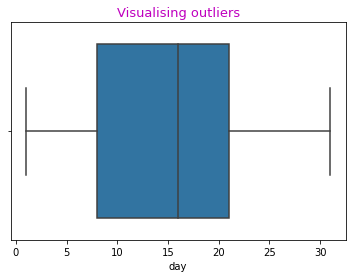

In [64]:
sns.boxplot('day',data=df)
plt.title("Visualising outliers",color='m',size=13)

No outliers in the data.

# **mon**



In [65]:
df['mon'].isnull().sum()

0

In [66]:
df['mon'][0]

'may'

In [67]:
df['mon'].value_counts()

may    13191
jul     6600
aug     6035
jun     4978
nov     3842
apr     2820
feb     2533
jan     1318
oct      690
sep      532
mar      448
dec      200
Name: mon, dtype: int64

# **dur**

In [68]:
df['dur'].isnull().sum()

0

In [69]:
df['dur'][0]

261.0

In [70]:
df['dur'] = df['dur'].astype('int64')

As duration is in seconds, we don't need milli seconds, so converting to integer.

In [71]:
(df['dur']==0).sum()

3

duration=0, means may be the person didn't lift the call. So i am not treating it as a null value.

In [72]:
print("Minimum duration of call is:",(df['dur']).min(),"sec")
print("Maximum duration of call is:",(df['dur']).max(),"sec")

Minimum duration of call is: 0 sec
Maximum duration of call is: 4918 sec


In [73]:
df['dur'].value_counts()

124     176
90      172
89      172
114     172
122     169
       ... 
1327      1
1331      1
1608      1
1833      1
1556      1
Name: dur, Length: 1558, dtype: int64

In [74]:
df['dur'].describe()

count    43187.000000
mean       258.344340
std        258.173244
min          0.000000
25%        103.000000
50%        180.000000
75%        318.000000
max       4918.000000
Name: dur, dtype: float64

In [75]:
#Finding the IQR
percentile25 = df['dur'].quantile(0.25)
percentile75 = df['dur'].quantile(0.75)
iqr=percentile75 - percentile25
print(iqr)
print(percentile25)
print(percentile75)

215.0
103.0
318.0


In [76]:
#Finding upper and lower limit
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print(upper_limit)
print(lower_limit)

640.5
-219.5


In [77]:
df[df['dur'] < lower_limit]

,age,job,marital,education_qual,day,mon,dur,num_calls,prev_outcome,insurance_stat


In [78]:
df[df['dur'] > upper_limit]

,age,job,marital,education_qual,day,mon,dur,num_calls,prev_outcome,insurance_stat
33,53,technician,married,secondary,5,may,1666,1.0,unknown,no
38,54,retired,married,secondary,5,may,1492,1.0,unknown,no
47,42,admin,single,secondary,5,may,787,1.0,unknown,no
51,46,services,married,primary,5,may,1778,1.0,unknown,no
53,53,technician,divorced,secondary,5,may,812,1.0,unknown,no
...,...,...,...,...,...,...,...,...,...,...
43105,27,blue-collar,single,primary,26,oct,701,2.0,unknown,yes
43175,34,blue-collar,single,secondary,16,nov,1166,3.0,other,no
43176,38,technician,married,secondary,16,nov,1556,4.0,unknown,yes
43182,51,technician,married,tertiary,17,nov,977,3.0,unknown,yes


In [79]:
len(df[df['dur'] > upper_limit])

3124

In [80]:
df_high_dur = df[df['dur'] > upper_limit]
print((df_high_dur['insurance_stat']=='yes').sum())
print((df_high_dur['insurance_stat']=='no').sum())

1600
1524


In [81]:
print((df_high_dur['insurance_stat']=='yes').sum()/3124)
print((df_high_dur['insurance_stat']=='no').sum()/3124)

0.5121638924455826
0.4878361075544174


There are outliers, but i am not going to clean them. Beacause a person can talk for how much time they need.

# **num_calls**

In [82]:
df['num_calls'].isnull().sum()

0

In [83]:
df['num_calls'][0]

1.0

number of contacts performed during this campaign for the client should be integer, so converting data type.

In [84]:
df['num_calls'] = df['num_calls'].astype('int64')

In [85]:
df['num_calls'].unique()

array([ 1,  2,  3,  5,  4,  7,  8,  6,  9, 10, 11, 12, 13, 19, 14, 24, 16,
       32, 18, 22, 15, 17, 25, 21, 43, 51, 41, 26, 28, 55, 50, 38, 23, 20,
       29, 31, 37, 30, 46, 27, 58, 33, 35, 34, 36, 39, 44])

In [86]:
(df['num_calls']==0).sum()

0

In [87]:
df['num_calls'].describe()

count    43187.000000
mean         2.758237
std          3.064160
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         58.000000
Name: num_calls, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Visualising outliers')

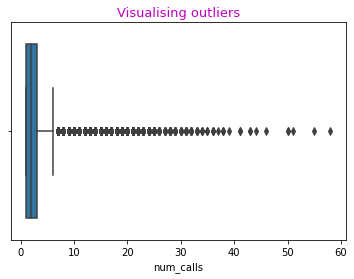

In [88]:
sns.boxplot('num_calls',data=df)
plt.title("Visualising outliers",color='m',size=13)

In [89]:
#Finding the IQR
percentile25 = df['num_calls'].quantile(0.25)
percentile75 = df['num_calls'].quantile(0.75)
iqr=percentile75 - percentile25
print(iqr)
print(percentile25)
print(percentile75)

2.0
1.0
3.0


In [90]:
#Finding upper and lower limit
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print(upper_limit)
print(lower_limit)

6.0
-2.0


In [91]:
df[df['num_calls'] < lower_limit]

,age,job,marital,education_qual,day,mon,dur,num_calls,prev_outcome,insurance_stat


In [92]:
df[df['num_calls'] > upper_limit]

,age,job,marital,education_qual,day,mon,dur,num_calls,prev_outcome,insurance_stat
679,59,services,married,secondary,6,may,250,7,unknown,no
701,30,admin,married,secondary,7,may,172,8,unknown,no
822,27,services,single,secondary,7,may,388,7,unknown,no
1008,43,admin,married,tertiary,7,may,244,7,unknown,no
1278,37,admin,married,primary,8,may,161,8,unknown,no
...,...,...,...,...,...,...,...,...,...,...
42676,25,technician,single,secondary,2,sep,206,7,other,no
42690,27,self-employed,single,tertiary,3,sep,543,9,failure,no
42772,37,services,single,tertiary,13,sep,323,9,other,yes
42878,38,management,married,tertiary,24,sep,246,12,failure,no


In [93]:
a = len(df[df['num_calls'] > upper_limit])
print(a)

2900


In [94]:
df_high_calls = df[df['num_calls'] > upper_limit]
b = (df_high_calls['insurance_stat']=='yes').sum()
c = (df_high_calls['insurance_stat']=='no').sum()
print(b,c)

153 2747


In [95]:
print((b/a)*100) #yes
print((c/a)*100)#no

5.275862068965517
94.72413793103448


There are outliers, but i am not going to clean them. Beacause there can be many number of calls

# **prev_outcome**

In [96]:
df['prev_outcome'].isnull().sum()

0

In [97]:
df['prev_outcome'][0]

'unknown'

In [98]:
df['prev_outcome'].value_counts()

unknown    35280
failure     4709
other       1774
success     1424
Name: prev_outcome, dtype: int64

In [99]:
print("The percentage of unknown data is:", ((df['prev_outcome']=='unknown').sum()/df.shape[0])*100)

The percentage of unknown data is: 81.69124968161715


As 81 percent of data is missing, i am going to drop this feature.

In [100]:
df.drop(['prev_outcome'],axis=1,inplace=True)

In [101]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'day', 'mon', 'dur',
       'num_calls', 'insurance_stat'],
      dtype='object')

# **EDA**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


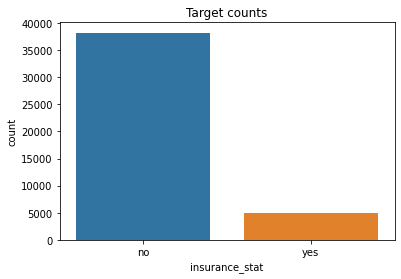

In [102]:
sns.countplot(df['insurance_stat'])
plt.title("Target counts")
plt.show()

# **job**

In [103]:
df_ins_yes = df[df['insurance_stat']=='yes']
df_ins_no = df[df['insurance_stat']=='no']

In [104]:
def feature(feature):
  plt.subplot(2,2,1)
  sns.countplot(df[feature],order = df[feature].value_counts().index[::-1])
  plt.title("Countplot of "+ feature,size=15)
  plt.xticks(rotation=60)
  plt.subplot(2,2,2)
  sns.countplot(x=feature,hue='insurance_stat',data=df,order=df[feature].value_counts().index[::-1])
  plt.title("Distribution of "+feature,size=15)
  plt.xticks(rotation=60)
  plt.subplot(2,2,3)
  sns.countplot(df_ins_yes[feature],order=df_ins_yes[feature].value_counts().index[::-1])
  plt.title(feature + " vs (target variable==yes)",size=15)
  plt.xticks(rotation=60)
  plt.subplot(2,2,4)  
  sns.countplot(df_ins_no[feature],order=df_ins_no[feature].value_counts().index[::-1])
  plt.title(feature + " vs (target variable==no)",size=15)
  plt.xticks(rotation=60)
  plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


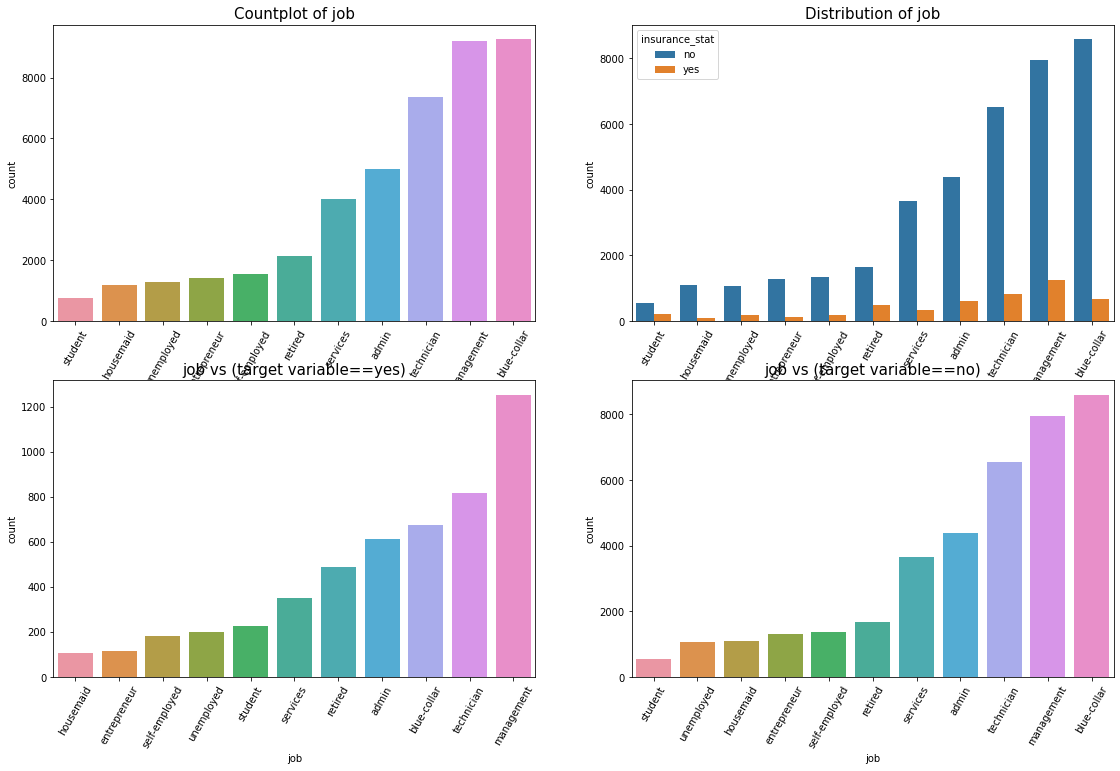

In [105]:
plt.figure(figsize=(19,12))
feature("job")

1.   The most targeted customers: Blue-collar job, but comparing with conversion rate, we end up in losing lot of money.(Better to avoid targetting Blue-collar customers a lot) 
2.   Convertion rate is maximum: Management.
3.   we need to target students also, as we can see from graphs that we put in very little time to target students, but their conversion rate is.average.(More than housemaid, entrepreneur, self employed and unemployed)


# **MARITAL**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


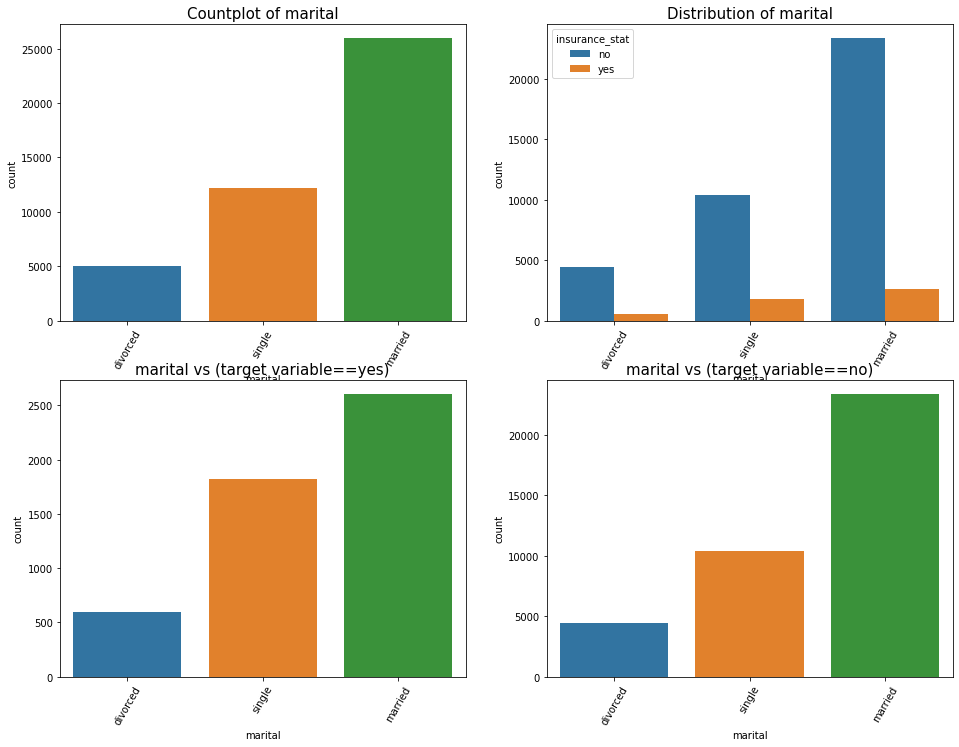

In [106]:
plt.figure(figsize=(16,12))
feature("marital")

1. Married people are mostly opting for the insurance.
2. Divorced people are at low.

# **education_qual**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


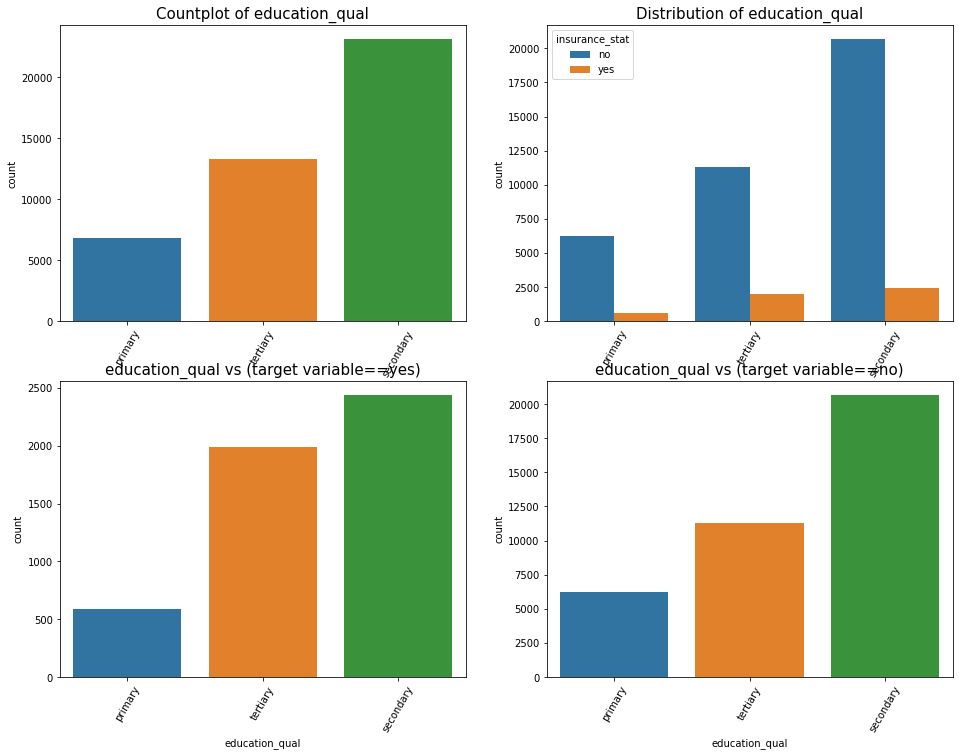

In [107]:
plt.figure(figsize=(16,12))
feature("education_qual")

1. People with higher education(Secondary/Tertiary --> Collage/Masters) are opting for insurance plans.
2. We need to concentrate on spreading awareness about health insurance to people with less education.

# **mon**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


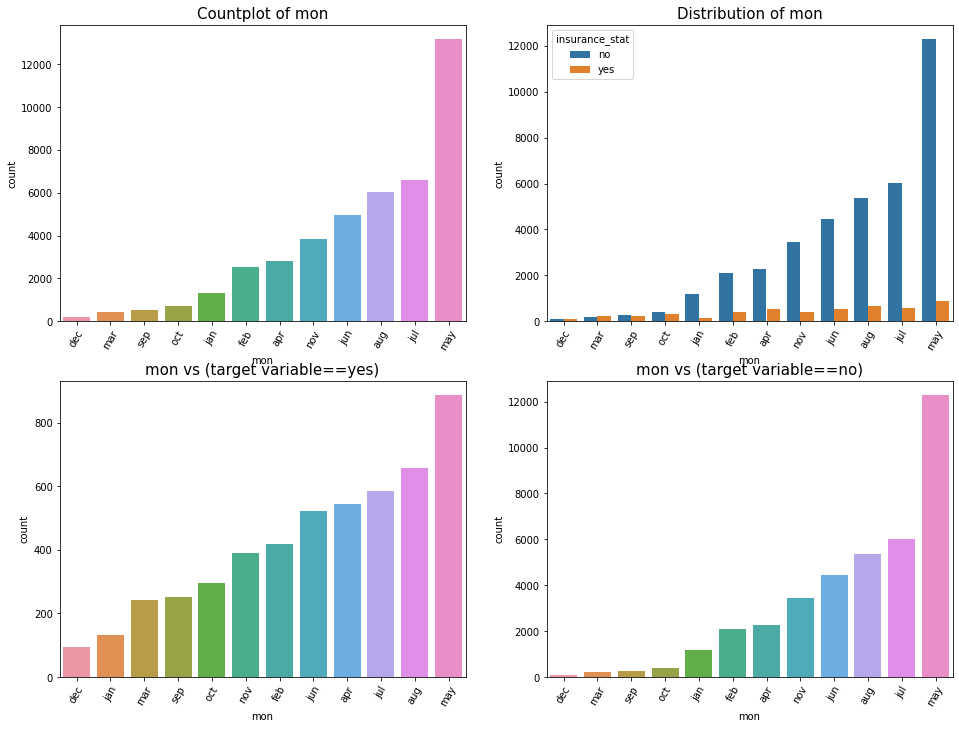

In [108]:
plt.figure(figsize=(16,12))
feature("mon")

1. People opting for Insurance plans when targeted during start of new financial year/When they get their appraisal cycle result.

# **AGE**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


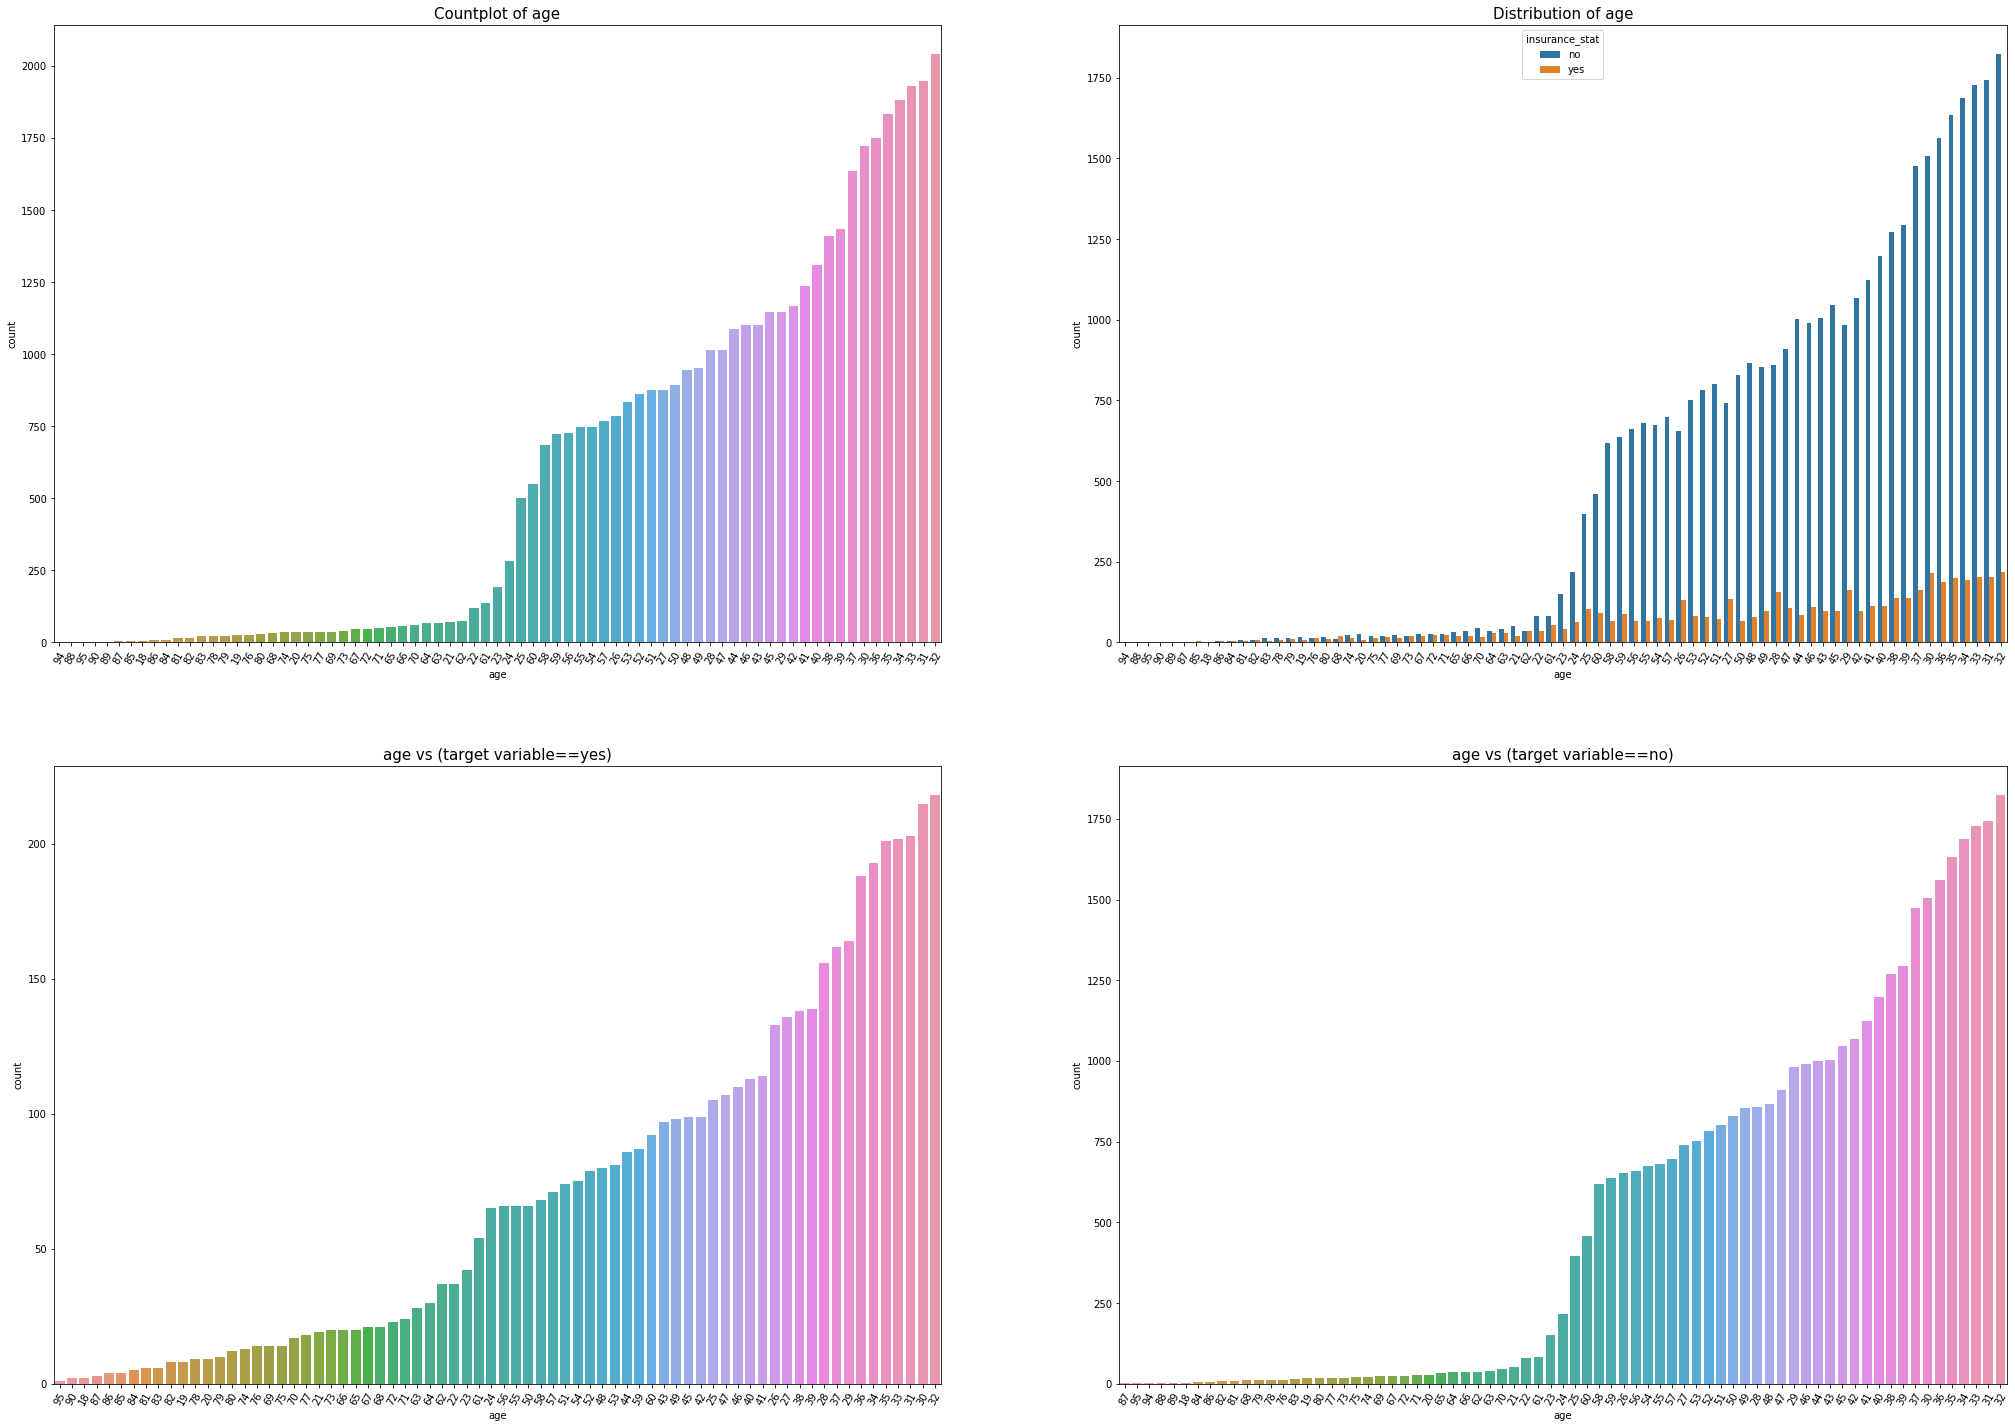

In [127]:
plt.figure(figsize=(35,25))
feature("age")

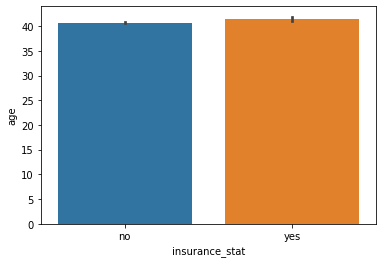

In [126]:
sns.barplot(y='age',x='insurance_stat',data=df)

In [128]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'day', 'mon', 'dur',
       'num_calls', 'insurance_stat'],
      dtype='object')

# **DAY**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


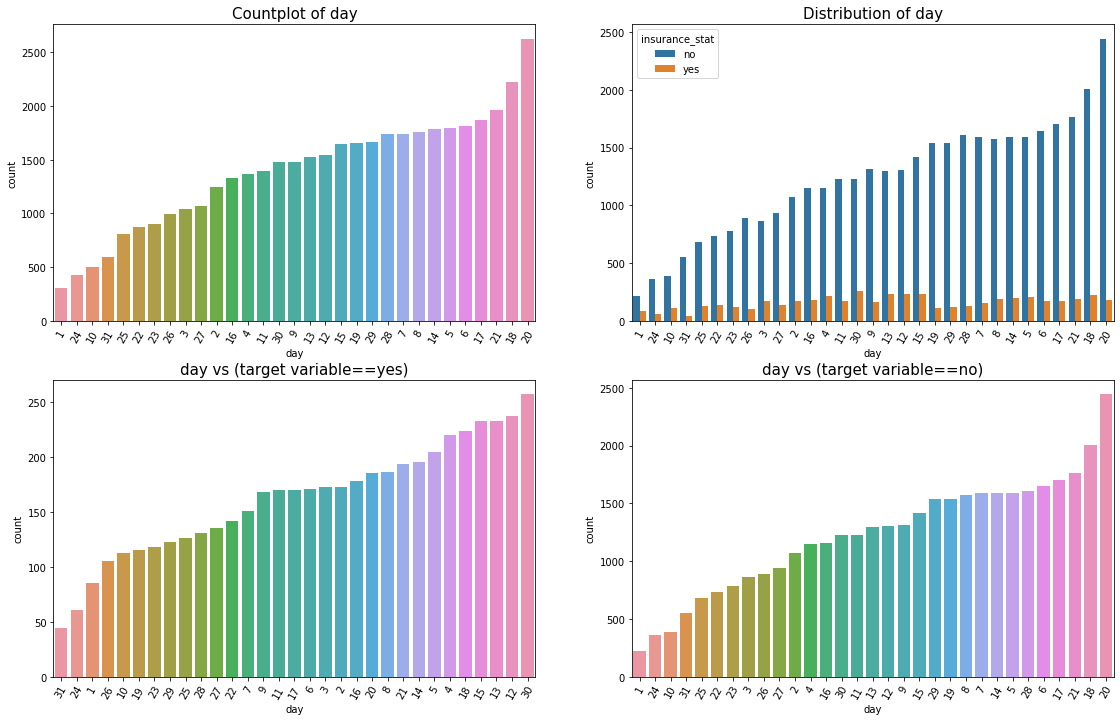

In [131]:
plt.figure(figsize=(19,12))
feature("day")

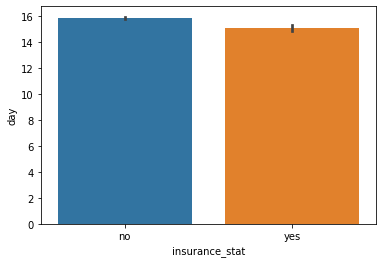

In [130]:
sns.barplot(y='day',x='insurance_stat',data=df)

# **Duration**

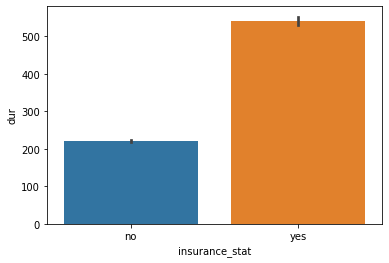

In [133]:
sns.barplot(y='dur',x='insurance_stat',data=df)

# **Number of calls**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


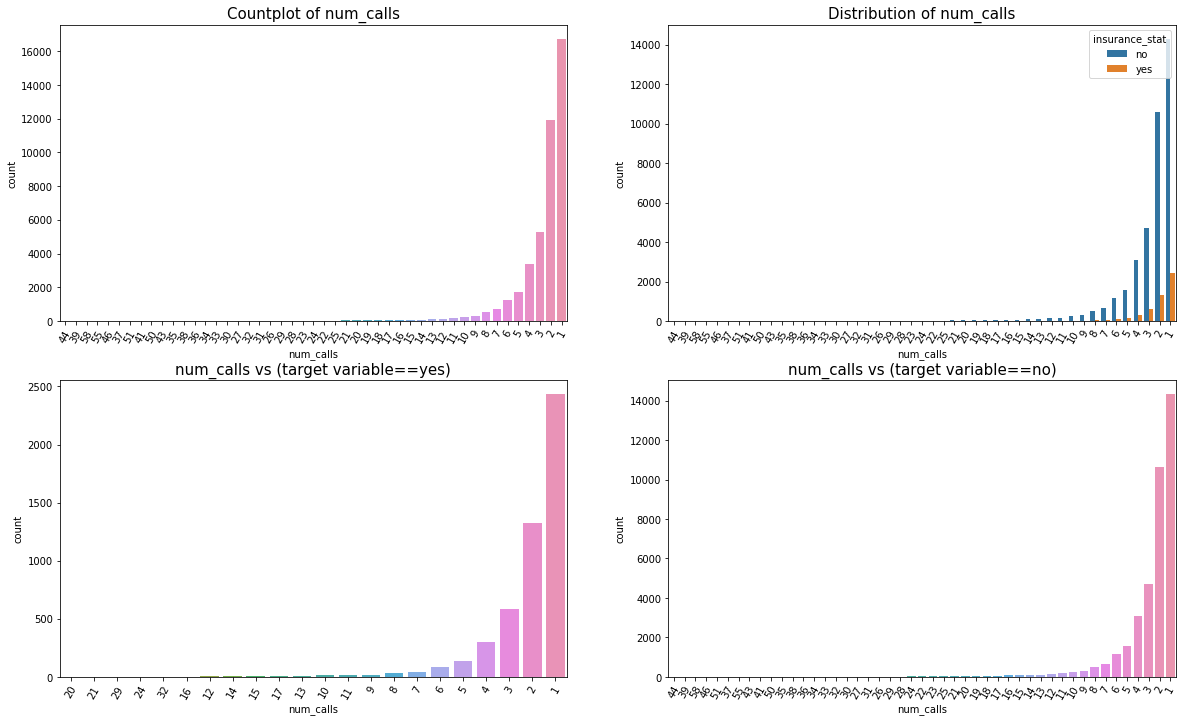

In [135]:
plt.figure(figsize=(20,12))
feature("num_calls")

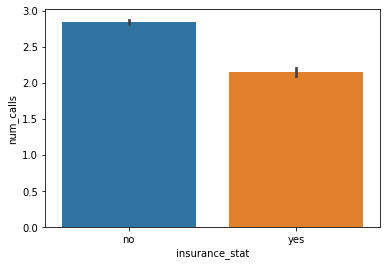

In [134]:
sns.barplot(y='num_calls',x='insurance_stat',data=df)

# **Encoding**

In [136]:
df['insurance_stat'] = df['insurance_stat'].map({'yes':1,'no':0})

In [137]:
df['insurance_stat'].value_counts()

0    38166
1     5021
Name: insurance_stat, dtype: int64

In [138]:
df.marital = df.marital.map({'divorced':1, 'single':2, 'married':3})
df.education_qual = df.education_qual.map({'primary':1, 'tertiary':2, 'secondary':3})
df.mon = df.mon.map({'dec': 1, 'jan': 2, 'mar' : 3, 'sep' : 4, 'oct' : 5, 'nov' : 6, 'feb' : 7, 'jun' : 8, 'apr' : 9, 'jul' : 10, 'aug' : 11, 'may' :12})

In [139]:
df=pd.get_dummies(df,columns=["job"],prefix='job')

In [140]:
df.dtypes

age                  int64
marital              int64
education_qual       int64
day                  int64
mon                  int64
dur                  int64
num_calls            int64
insurance_stat       int64
job_admin            uint8
job_blue-collar      uint8
job_entrepreneur     uint8
job_housemaid        uint8
job_management       uint8
job_retired          uint8
job_self-employed    uint8
job_services         uint8
job_student          uint8
job_technician       uint8
job_unemployed       uint8
dtype: object

# **Data preparation and splitting**

In [141]:
X = df.drop(['insurance_stat'],axis=1)
y = df['insurance_stat']

In [142]:
print(f"Independent features has {X.shape[0]} rows and {X.shape[1]} columns")
print(f"Dependent features has {y.shape[0]} rows and 1 column")

Independent features has 43187 rows and 18 columns
Dependent features has 43187 rows and 1 column


In [143]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [144]:
print("The shape of X train:", X_train.shape)
print("The shape of X test:", X_test.shape)
print("The shape of y train:", y_train.shape)
print("The shape of y test:", y_test.shape)

The shape of X train: (34549, 18)
The shape of X test: (8638, 18)
The shape of y train: (34549,)
The shape of y test: (8638,)


In [145]:
y_train.value_counts()

0    30487
1     4062
Name: insurance_stat, dtype: int64

# **Scaling the data**

In [146]:
from sklearn.preprocessing import StandardScaler # importing the required function
scaler = StandardScaler() #initialising
scaler.fit(X_train) # finds the values of mu and sigma
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test) #only transform the test dataset, dont fit it

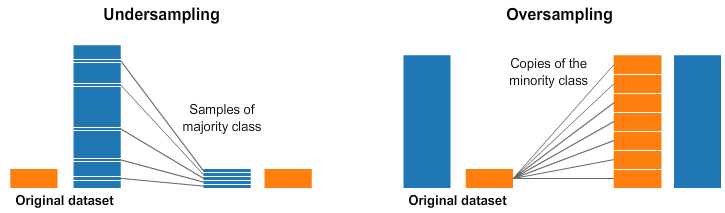

In [147]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Random under-sampling and over-sampling with imbalanced-learn**

In [148]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler # From imblearn pkg , from under_sampling module, importting RandomUnderSampler class.

rus = RandomUnderSampler() #Intialise the model
X_rus, y_rus = rus.fit_resample(X_train, y_train) #resampling the data ## Decreases the major class # balances data

In [149]:
print("classes distribution after undersampling")
print(y_rus.value_counts())
print("----------------------------------------------------")
print("classes distribution before undersampling")
print(y_train.value_counts())

classes distribution after undersampling
0    4062
1    4062
Name: insurance_stat, dtype: int64
----------------------------------------------------
classes distribution before undersampling
0    30487
1     4062
Name: insurance_stat, dtype: int64


In [150]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler() #Initialis the model 
X_ros, y_ros = ros.fit_resample(X_train, y_train) #Fit the model # increases the majority class

In [151]:
print("classes distribution after oversampling")
print(y_ros.value_counts())
print("----------------------------------------------------")
print("classes distribution before oversampling")
print(y_train.value_counts())

classes distribution after oversampling
0    30487
1    30487
Name: insurance_stat, dtype: int64
----------------------------------------------------
classes distribution before oversampling
0    30487
1     4062
Name: insurance_stat, dtype: int64


SMOTE (Synthetic Minority Oversampling TEchnique) consists of synthesizing elements for the minority class, based on those that already exist. It works randomly picingk a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

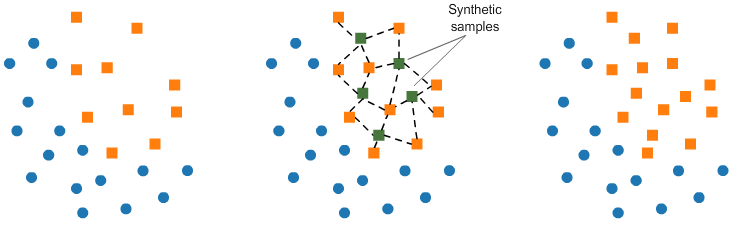

# **Over-sampling followed by under-sampling**

Now, we will do a combination of over-sampling and under-sampling, using the SMOTE and Tomek links techniques:

In [153]:
from imblearn.combine import SMOTEENN
smt = SMOTEENN(sampling_strategy='all')#startegy = all, increase minority datapoints decrease majority data points, do under & over sampling
X_smt, y_smt = smt.fit_resample(X_train_scaled, y_train)

In [154]:
X_smt.shape

(51606, 18)

In [155]:
y_smt.value_counts()

1    28180
0    23426
Name: insurance_stat, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


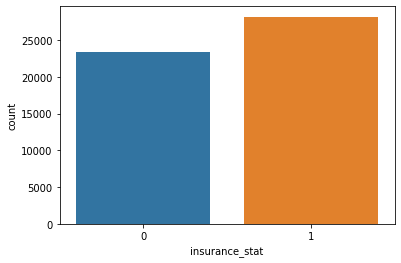

In [156]:
sns.countplot(y_smt)

# **Logistic regression**

In [157]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_smt,y_smt) #train model on balanced data
#print( "AUROC on the sampled dataset : ",roc_auc_score(y_test, lr.predict_proba(X)[:, 1]))

LogisticRegression()

In [158]:
y_pred=lr.predict(X_test_scaled)

In [159]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.tail()

,Actual,Predicted
11363,0,0
29327,1,1
26123,0,1
31427,0,0
42776,0,0


In [160]:
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve, confusion_matrix,f1_score
print(f1_score(y_test,y_pred))

0.42704436130411544


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


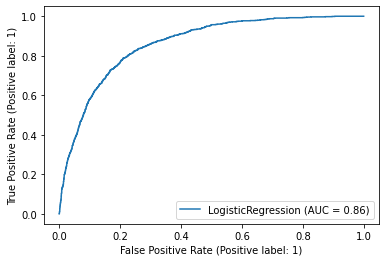

In [161]:
plot_roc_curve(lr, X_test_scaled, y_test)

# **KNN Algoritm**

In [162]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [163]:
for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
  knn = KNeighborsClassifier(i) #initialising the model
  knn.fit(X_smt,y_smt) # training the model
  print("K value  : " , i, " train score : ", knn.score(X_smt,y_smt) , " score : ", np.mean(cross_val_score(knn, X_smt, y_smt, cv=10)))

K value  :  1  train score :  1.0  score :  0.9966089289227945
K value  :  2  train score :  0.999631825756695  score :  0.9958532126007669
K value  :  3  train score :  0.9975778010308879  score :  0.9889547763563638
K value  :  4  train score :  0.9969189629112893  score :  0.9883347227041209
K value  :  5  train score :  0.9927334030926637  score :  0.9788590186686374
K value  :  6  train score :  0.9923458512576057  score :  0.9787815556146351
K value  :  7  train score :  0.985331163043057  score :  0.9686858204572456
K value  :  8  train score :  0.9850792543502693  score :  0.96901530410698
K value  :  9  train score :  0.976863155447041  score :  0.9610898712616537
K value  :  10  train score :  0.9769019106305469  score :  0.9609348662974695
K value  :  20  train score :  0.9455877223578654  score :  0.9319072043005908
K value  :  50  train score :  0.9038483897221253  score :  0.8933847362974244


In [169]:
knn = KNeighborsClassifier(1) # at k=1 we got best cross val score(Average of evaluation metric)
knn.fit(X_smt,y_smt)

KNeighborsClassifier(n_neighbors=1)

In [170]:
y_pred=knn.predict(X_test_scaled)

In [171]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.tail()

,Actual,Predicted
11363,0,0
29327,1,1
26123,0,0
31427,0,1
42776,0,1


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


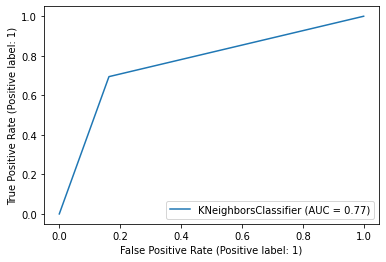

In [172]:
plot_roc_curve(knn, X_test_scaled, y_test)

# **Decission tree**

In [168]:
from sklearn.tree import DecisionTreeClassifier
for depth in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]:
  dt = DecisionTreeClassifier(max_depth=depth) 
  dt.fit(X_smt, y_smt) 
  trainAccuracy = accuracy_score(y_smt, dt.predict(X_smt)) 
  dt = DecisionTreeClassifier(max_depth=depth) 
  valAccuracy = cross_val_score(dt, X_smt, y_smt, cv=10) 
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.7799286904623494  Cross val score :  0.7797931527301512
Depth  :  2  Training Accuracy :  0.7973103902646979  Cross val score :  0.7972329404042543
Depth  :  3  Training Accuracy :  0.8410843700344921  Cross val score :  0.8408713870726935
Depth  :  4  Training Accuracy :  0.8431965275355578  Cross val score :  0.8426929047462408
Depth  :  5  Training Accuracy :  0.854454908343991  Cross val score :  0.8493587903612214
Depth  :  6  Training Accuracy :  0.867806069061737  Cross val score :  0.8650938125686236
Depth  :  7  Training Accuracy :  0.8823780180599156  Cross val score :  0.876255228915735
Depth  :  8  Training Accuracy :  0.8964267720807658  Cross val score :  0.8906335643443898
Depth  :  9  Training Accuracy :  0.9048947796767818  Cross val score :  0.897803254582295
Depth  :  10  Training Accuracy :  0.9179552765182343  Cross val score :  0.9068720494646041
Depth  :  11  Training Accuracy :  0.9297756074875014  Cross val score :  0.9139255

In [173]:
dt = DecisionTreeClassifier(max_depth=24) # Instantiate model # max depth = log2 18 is 4.16.i.e, 4 # To control overfitting
dt.fit(X_smt, y_smt)

DecisionTreeClassifier(max_depth=24)

In [174]:
y_pred = dt.predict(X_test_scaled)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [175]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
11901,0,0
39995,0,0
824,0,0
40928,1,0
32435,0,1


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


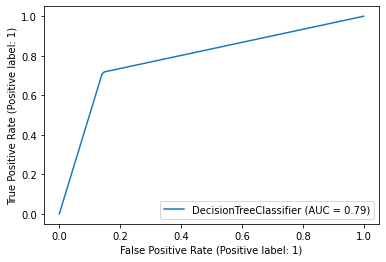

In [176]:
plot_roc_curve(dt, X_test_scaled, y_test)

# **Random forest**

In [177]:
from sklearn.ensemble import RandomForestClassifier
# Instantiate model # max depth = log2 18 is 4.16.i.e, 4 fearures = sqrt(18) # To control overfitting
rf = RandomForestClassifier(n_estimators= 100, max_depth = 4, max_features='sqrt')
rf.fit(X_smt,y_smt)

RandomForestClassifier(max_depth=4, max_features='sqrt')

In [178]:
y_pred = rf.predict(X_test_scaled)
y_pred

array([0, 1, 0, ..., 1, 1, 0])

In [179]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
11901,0,0
39995,0,1
824,0,0
40928,1,0
32435,0,1


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


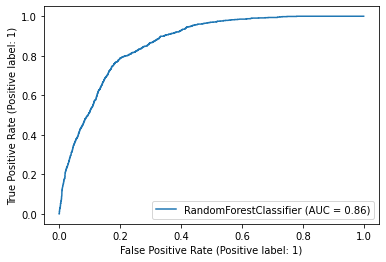

In [180]:
plot_roc_curve(rf, X_test_scaled, y_test)

# **XG boost**

In [181]:
import xgboost as xgb
for lr in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,0.75,0.8,0.9,1]:
  model = xgb.XGBClassifier(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model
  model.fit(X_smt,y_smt) #train the model
  print("Learning rate : ", lr, " Train score : ", model.score(X_smt,y_smt), " Cross-Val score : ", np.mean(cross_val_score(model, X_smt, y_smt, cv=10)))

Learning rate :  0.01  Train score :  0.8496298879975197  Cross-Val score :  0.8486612586347517
Learning rate :  0.02  Train score :  0.8650738286245785  Cross-Val score :  0.8642021369273726
Learning rate :  0.03  Train score :  0.8837732046661241  Cross-Val score :  0.8837542788865207
Learning rate :  0.04  Train score :  0.9013099252024959  Cross-Val score :  0.8996440206738374
Learning rate :  0.05  Train score :  0.9091966050459249  Cross-Val score :  0.9070656639164636
Learning rate :  0.06  Train score :  0.9139634926171375  Cross-Val score :  0.9132665045984417
Learning rate :  0.07  Train score :  0.9182653179862806  Cross-Val score :  0.9194093521927273
Learning rate :  0.08  Train score :  0.9251249854668062  Cross-Val score :  0.9240017821496644
Learning rate :  0.09  Train score :  0.9323140720071309  Cross-Val score :  0.9278967329509185
Learning rate :  0.1  Train score :  0.9334961051040577  Cross-Val score :  0.9315592532845478
Learning rate :  0.11  Train score :  0.9

In [182]:
model = xgb.XGBClassifier(learning_rate = 0.7, n_estimators=100)
model.fit(X_smt,y_smt) #train the model

XGBClassifier(learning_rate=0.7)

In [183]:
y_pred = model.predict(X_test_scaled)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [184]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
11901,0,0
39995,0,0
824,0,0
40928,1,0
32435,0,1


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


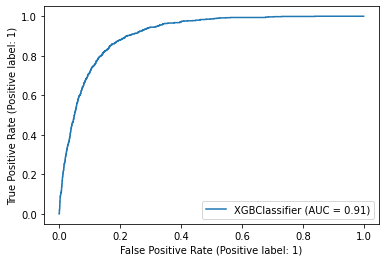

In [185]:
plot_roc_curve(model, X_test_scaled, y_test)

# **Feature Importances**

In [187]:
rf.feature_importances_

array([6.59215849e-02, 1.90574038e-02, 7.96146763e-03, 1.70099689e-02,
       1.60701714e-01, 5.75180953e-01, 1.20254928e-01, 1.71907266e-04,
       1.43983868e-02, 3.37241053e-04, 3.48383960e-04, 8.17260479e-04,
       6.88127058e-03, 5.92152832e-05, 8.85682711e-04, 9.67056284e-03,
       1.63636794e-04, 1.78432126e-04])

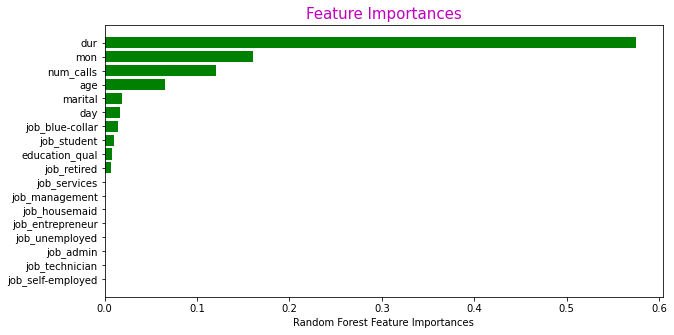

In [188]:
sorted_idx = rf.feature_importances_.argsort()
plt.figure(figsize=(10,5))
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx], color="green")
plt.xlabel("Random Forest Feature Importances")
plt.title("Feature Importances",color='m',size=15)
plt.show()

In [189]:
model.feature_importances_

array([0.02590611, 0.01941309, 0.04974987, 0.02576633, 0.1055136 ,
       0.22336833, 0.12924175, 0.01514103, 0.14087614, 0.02480533,
       0.01386111, 0.0310306 , 0.00787131, 0.00755252, 0.03436135,
       0.13279732, 0.00778106, 0.00496304], dtype=float32)

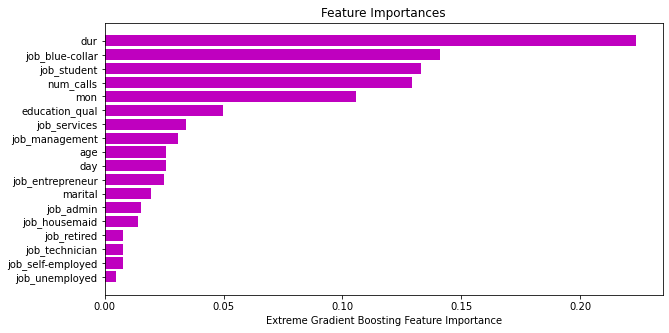

In [190]:
sorted_idx = model.feature_importances_.argsort()
plt.figure(figsize=(10,5))
plt.barh(X.columns[sorted_idx], model.feature_importances_[sorted_idx], color="m")
plt.xlabel("Extreme Gradient Boosting Feature Importance")
plt.title("Feature Importances")
plt.show()